# APIs Lab
In this lab we will practice using APIs to retrieve and store data.

In [1]:
# Imports at the top
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1: Get Data From Sheetsu

[Sheetsu](https://sheetsu.com/) is an online service that allows you to access any Google spreadsheet from an API. This can be a very handy way to share a dataset with colleagues as well as to create a mini centralized data storage, that is simpler to edit than a database.

A Google Spreadsheet with wine data can be found [here](https://docs.google.com/a/generalassemb.ly/spreadsheets/d/1JWRwDnwIMLgvPqNMdJLmAJgzvz0K3zAUc6jev3ci1c8/edit?usp=sharing).

You can access it through the Sheetsu API at this endpoint: https://sheetsu.com/apis/v1.0/cc9420722ae4. [Here](https://sheetsu.com/docs/beta) is Sheetsu's documentation.


Questions:

1. Use the requests library to access the document. Inspect the response text. What kind of data is it?
2. Check the status code of the response object. What code is it?
3. Use the appropriate libraries and read functions to read the response into a Pandas Dataframe
4. Once you've imported the data into a dataframe, check the value of the 5th line: what's the price?

In [13]:
import requests
url = 'https://sheetsu.com/apis/v1.0/cc9420722ae4'
response = requests.get(url)

In [14]:
type(response)

requests.models.Response

In [15]:
response

<Response [200]>

In [16]:
response.text[:200]

u'[{"Color":"W","Region":"Portugal","Country":"Portugal","Vintage":"2013","Vinyard":"Vinho Verde","Name":"","Grape":"","Consumed In":"2015","Score":"4","Price":""},{"Color":"W","Region":"France","Countr'

In [18]:
response1 = json.loads(response.text)

In [20]:
type(response1)

list

In [21]:
response1[0]

{u'Color': u'W',
 u'Consumed In': u'2015',
 u'Country': u'Portugal',
 u'Grape': u'',
 u'Name': u'',
 u'Price': u'',
 u'Region': u'Portugal',
 u'Score': u'4',
 u'Vintage': u'2013',
 u'Vinyard': u'Vinho Verde'}

In [25]:
response.status_code

200

In [26]:
wine_df = pd.DataFrame(response1)
wine_df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland


> Answers:
    1. A JSON string.
    2. 200
    3. Options inlucde: pd.read_json; json.loads + pd.Dataframe
    4. 5

### Exercise 2: Post Data to Sheetsu
Now that we've learned how to read data, it'd be great if we could also write data. For this we will need to use a _POST_ request.

1. Use the post command to add the following data to the spreadsheet:

In [27]:
post_data = {
'Grape' : ''
, 'Name' : 'My wonderful wine'
, 'Color' : 'R'
, 'Country' : 'US'
, 'Region' : 'Sonoma'
, 'Vinyard' : ''
, 'Score' : '10'
, 'Consumed In' : '2015'
, 'Vintage' : '1973'
, 'Price' : '200'
}

In [28]:
wine_df = pd.read_json(response.text)
wine_df.tail(2)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
37,R,2015,US,,My wonderful wine,200,Sonoma,10,1973,
38,R,2015,US,,My wonderful wine,200,Sonoma,10,1973,


In [30]:
requests.post(url, data=post_data)

<Response [201]>

1. What status did you get? How can you check that you actually added the data correctly?
- In this exercise, your classmates are adding data to the same spreadsheet. What happens because of this? Is it a problem? How could you mitigate it?

## Exercise 3: Data munging

Get back to the dataframe you've created in the beginning. Let's do some data munging:

1. Search for missing data
    - Is there any missing data? How do you deal with it?
    - Is there any data you can just remove?
    - Are the data types appropriate?
- Summarize the data 
    - Try using describe, min, max, mean, var

In [32]:
wine_df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland


In [51]:
wine_df.dtypes

Color          object
Consumed In     int64
Country        object
Grape          object
Name           object
Price          object
Region         object
Score          object
Vintage         int64
Vinyard        object
dtype: object

In [63]:
wine_df = wine_df[wine_df['Price'] != '']

In [64]:
wine_df['Price'] = wine_df['Price'].apply(lambda x: float(x))

In [66]:
median = float(wine_df['Price'].describe().loc['50%'])
median

15.0

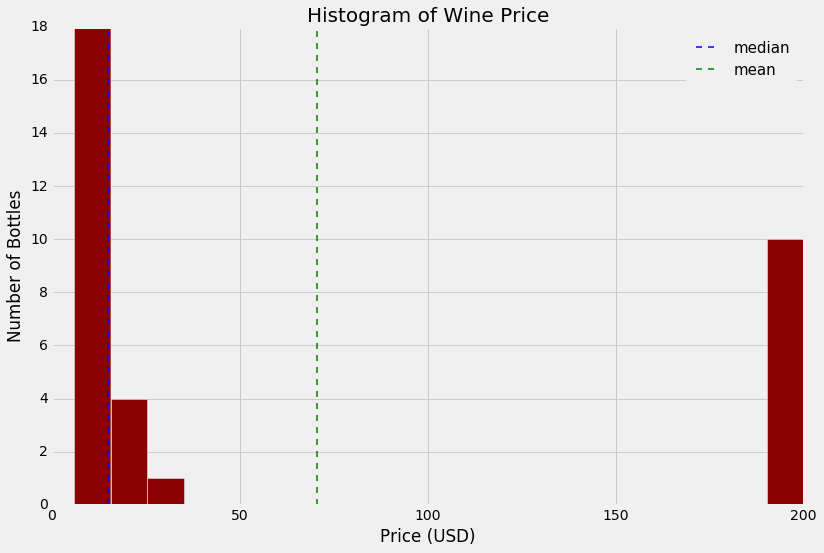

In [68]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hist = plt.hist(wine_df['Price'], color = 'darkred', bins = 20)
plt.axvline(wine_df['Price'].median(), color='b', linestyle='dashed', linewidth=1.5, label = 'median')
plt.axvline(wine_df['Price'].mean(), color='g', linestyle='dashed', linewidth=1.5, label = 'mean')

plt.title('Histogram of Wine Price', fontsize = 20)

# y label
plt.ylabel('Number of Bottles')

# x label
plt.xlabel('Price (USD)')

plt.xlim([0, max(wine_df['Price'])])
#plt.ylim([-10, 85])

plt.legend(loc='upper right', fontsize = 15)

plt.show()

In [69]:
def price_dummify(x):
    price_dummy = []
    for i in wine_df['Price']:
        if i > median:
            price_dummy.append(1)
        elif i <= median:
            price_dummy.append(0)
        # This shouldn't happen, but just in case...
        else:
            price_dummy.append('NaN')
    x['price_dummy'] = price_dummy
    return x

In [70]:
price_dummify(wine_df)
wine_df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard,price_dummy
1,W,2015,France,,,17.8,France,3,2013,Peyruchet,1
2,W,2015,US,,,20.0,Oregon,3,2013,Abacela,1
3,W,2015,Spain,chardonay,,7.0,Spain,2.5,2012,Ochoa,0
4,R,2015,US,"chiraz, cab",Spice Trader,6.0,,3,2012,Heartland,0
5,R,2015,US,cab,,13.0,California,3.5,2012,Crow Canyon,0


In [33]:
wine_df['Color'].value_counts()

R    25
W    13
P     1
Name: Color, dtype: int64

In [71]:
wine_df = wine_df[wine_df['Color'] != 'P']

In [72]:
wine_df['Color'].value_counts()

R    23
W     9
Name: Color, dtype: int64

In [36]:
wine_df['Consumed In'].value_counts()

2015    29
2014     6
2013     4
Name: Consumed In, dtype: int64

In [37]:
wine_df['Country'].value_counts()

US          20
France       9
Italy        3
Portugal     2
Spain        2
             2
Oregon       1
Name: Country, dtype: int64

In [38]:
wine_df[wine_df['Country'] == '']

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
11,R,2015,,,Montepulciano D'Abruzzo,22,Tuscany,4.5,2013,Orizzonti
25,W,2015,,sauvignon blanc,Sauvignon Blanc,,Napa,3.5,2012,Two Angels


In [43]:
wine_df['Country'][11] = 'Italy'
wine_df['Country'][25] = 'US'
wine_df['Country'][2] = 'US'

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [44]:
wine_df['Country'].value_counts()

US          22
France       9
Italy        4
Spain        2
Portugal     2
Name: Country, dtype: int64

In [73]:
# make a dummy for europe vs US?

In [47]:
wine_df['Grape'].value_counts()

                                                                                   21
sauvignon blanc                                                                     4
merlot, cab                                                                         2
sangiovese                                                                          2
pinot noir                                                                          1
merlot                                                                              1
cab                                                                                 1
Chablis, Vincent Dampt, Vaillons 1er (Burgundy, France) 2012 W/ Limestone taste     1
chiraz                                                                              1
pinot griogio                                                                       1
chardonay                                                                           1
Albarino, Granbazan (Rias Baixas) 2012                

In [74]:
del wine_df['Grape']

In [76]:
del wine_df['Price']

In [48]:
wine_df['Name'].value_counts()

My wonderful wine                   10
                                     9
Saint Drezery Prestige               2
Sauvignon Blanc                      2
Meiomi                               1
Cru Classe                           1
Vincent Dampt                        1
Rosso Dei Poggi                      1
Spice Trader                         1
Domaine du Claouset                  1
Nero d'Avola                         1
#14                                  1
Sancerre Cuvee Des Moulins Bales     1
Pinot Grigio                         1
Rosso Di Montalcino                  1
Vinho Verde                          1
Cape Blush                           1
Uppercut North Coast                 1
Albarino                             1
Montepulciano D'Abruzzo              1
Name: Name, dtype: int64

In [49]:
wine_df[wine_df['Name'] == '']

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,US,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
5,R,2015,US,cab,,13,California,3.5,2012,Crow Canyon
7,R,2015,France,"merlot, cab",,12,Bordeaux,3.5,2012,David Beaulieu
8,R,2015,France,"merlot, cab",,11.99,Medoc,3.5,2011,Chantemerle
9,R,2015,US,merlot,,13,Washington,4,2011,Hyatt
12,R,2015,US,chiraz,,7,Oregon,3.5,2010,Abacelo


In [77]:
wine_df['Vinyard'].value_counts()

                     10
Abacela               2
Puech-Haut            2
Belle Glos            1
Crow Canyon           1
Rosso Dei Poggi       1
Granbazan             1
Hyatt                 1
Heartland             1
Provenance            1
Peyruchet             1
Orizzonti             1
Abacelo               1
Ochoa                 1
Truro Vineyards       1
Vaillons              1
Honig                 1
Celestin Blobdeau     1
Ridolfi               1
Chantemerle           1
David Beaulieu        1
Name: Vinyard, dtype: int64

In [78]:
del wine_df['Vinyard']

In [81]:
len(wine_df)

32

In [84]:
wine_df = wine_df[wine_df['Score'] != '']

In [85]:
wine_df['Score'].value_counts()

10     10
3       9
3.5     5
4       4
2.5     2
2       1
4.5     1
Name: Score, dtype: int64

In [88]:
wine_df['Region'].value_counts()

Sonoma         10
France          3
Oregon          3
Tuscany         3
Nappa           2
Burgundy        1
Spain           1
Medoc           1
Bordeaux        1
Napa            1
California      1
Washington      1
Loire           1
Truro           1
Rias Baixas     1
                1
Name: Region, dtype: int64

In [91]:
del wine_df['Region']
del wine_df['Name']

In [105]:
wine_df.dtypes

Color          object
Consumed In     int64
Country        object
Score          object
Vintage         int64
price_dummy     int64
dtype: object

In [94]:
wine_df.head()

,Color,Consumed In,Country,Score,Vintage,price_dummy
1,W,2015,France,3,2013,1
2,W,2015,US,3,2013,1
3,W,2015,Spain,2.5,2012,0
4,R,2015,US,3,2012,0
5,R,2015,US,3.5,2012,0


## Exercise 4: Feature Extraction

We would like to use a regression tree to predict the score of a wine. In order to do that, we first need to select and engineer appropriate features.

- Set the target to be the Score column, drop the rows with no score
- Use pd.get_dummies to create dummy features for all the text columns
- Fill the nan values in the numerical columns, using an appropriate method
- Train a Decision tree regressor on the Score, using a train test split:
        X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)
- Plot the test values, the predicted values and the residuals
- Calculate R^2 score
- Discuss your findings


In [98]:
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as st
import re
import sklearn
from sklearn import linear_model as lm
from sklearn import cross_validation, preprocessing
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
import matplotlib.patheffects as path_effects
from sklearn.metrics import mean_squared_error

% matplotlib inline

In [101]:
X = wine_df[['Color', 'Consumed In', 'Country', 'Vintage', 'price_dummy']]
X['intercept'] = 1
y = pd.DataFrame(wine_df['Score'])

In [102]:
model = st.MNLogit(y, X)

/Users/Rebecca/anaconda/lib/python2.7/site-packages/statsmodels/discrete/discrete_model.py:130: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  endog_dummies = get_dummies(endog.icol(0))


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Exercise 5: IMDB Movies

Sometimes an API doesn't provide all the information we would like to get and we need to be creative.
Here we will use a combination of scraping and API calls to investigate the ratings and gross earnings of famous movies.

## 5.a Get top movies

The Internet Movie Database contains data about movies. Unfortunately it does not have a public API.

The page http://www.imdb.com/chart/top contains the list of the top 250 movies of all times. Retrieve the page using the requests library and then parse the html to obtain a list of the `movie_ids` for these movies. You can parse it with regular expression or using a library like `BeautifulSoup`.

**Hint:** movie_ids look like this: `tt2582802`

## 5.b Get top movies data

Although the Internet Movie Database does not have a public API, an open API exists at http://www.omdbapi.com.

Use this API to retrieve information about each of the 250 movies you have extracted in the previous step.
- Check the documentation of omdbapi.com to learn how to request movie data by id
- Define a function that returns a python object with all the information for a given id
- Iterate on all the IDs and store the results in a list of such objects
- Create a Pandas Dataframe from the list

## 5.c Get gross data

The OMDB API is great, but it does not provide information about Gross Revenue of the movie. We'll revert back to scraping for this.

- Write a function that retrieves the gross revenue from the entry page at imdb.com
- The function should handle the exception of when the page doesn't report gross revenue
- Retrieve the gross revenue for each movie and store it in a separate dataframe

## 5.d Data munging

- Now that you have movie information and gross revenue information, let's clean the two datasets.
- Check if there are null values. Be careful they may appear to be valid strings.
- Convert the columns to the appropriate formats. In particular handle:
    - Released
    - Runtime
    - year
    - imdbRating
    - imdbVotes
- Merge the data from the two datasets into a single one

## 5.d Text vectorization

There are several columns in the data that contain a comma separated list of items, for example the Genre column and the Actors column. Let's transform those to binary columns using the count vectorizer from scikit learn.

Append these columns to the merged dataframe.

**Hint:** In order to get the actors name right, you'll have to set the `token_pattern` parameter in `CountVectorizer` to u'(?u)\\w+\.?\\w?\.? \\w+'. Can you see why? How does this differ from the default?

## Bonus:

- What are the top 10 grossing movies?
- Who are the 10 actors that appear in the most movies?
- What's the average grossing of the movies in which each of these actors appear?
- What genre is the oldest movie?
